In [1]:
import numpy as np

k0 = 2 * np.pi * 1e4 / 3
n_s = 3.46
n_f = 10.0
n_v = 1.0
d = 1e-8
theta = np.pi / 4
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5

lambda1 = n_v * np.cos(theta)                                      # n_v * cos(theta)
lambda2 = n_v * np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2) / n_f  # n_v * cos(phi)
lambda3 = n_f * np.cos(theta)                                      # n_f * cos(theta)
lambda4 = np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2)              # n_f * cos(phi)
lambda5 = n_f * np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2) / n_s  # n_f * cos(gamma)
lambda6 = n_s * np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2) / n_f  # n_s * cos(phi)
lambda7 = np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2)              # n_s * cos(gamma)

T12 = np.array([
    [2 * lambda7 / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda6 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
    [4 * a * sigma_xy_b * lambda7**2 * lambda6 / (n_s**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), 2 * lambda6 / (lambda6 + lambda5)]])

T21 = np.array([
    [2 * lambda4 / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda5 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
    [4 * a * sigma_xy_b * lambda4**2 * lambda5 / (n_f**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), 2 * lambda5 / (lambda6 + lambda5)]])

R12 = np.array([
    [(lambda7 - lambda4) / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda6 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
    [4 * a * sigma_xy_b * lambda7**2 * lambda6 / (n_s**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), (lambda6 - lambda5) / (lambda6 + lambda5)]])

R21 = np.array([
    [(lambda4 - lambda7) / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda5 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
    [4 * a * sigma_xy_b * lambda4**2 * lambda5 / (n_f**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), (lambda5 - lambda6) / (lambda6 + lambda5)]])

T23 = np.array([
    [2 * lambda4 / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda3 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
    [4 * a * sigma_xy_t * lambda4**2 * lambda3 / (n_f**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), 2 * lambda3 / (lambda3 + lambda2)]])

T32 = np.array([
    [2 * lambda1 / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda2 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
    [4 * a * sigma_xy_t * lambda1**2 * lambda2 / (n_v**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), 2 * lambda2 / (lambda3 + lambda2)]])

R23 = np.array([
    [(lambda4 - lambda1) / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda3 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
    [4 * a * sigma_xy_t * lambda4**2 * lambda3 / (n_f**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), (lambda3 - lambda2) / (lambda3 + lambda2)]])

R32 = np.array([
    [(lambda1 - lambda4) / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda2 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
    [4 * a * sigma_xy_t * lambda1**2 * lambda2 / (n_v**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), (lambda2 - lambda3) / (lambda3 + lambda2)]])

delta = k0 * d * lambda4
exp_idelta = np.exp(-1j * delta)
exp_2idelta = np.exp(-2j * delta)

E_incident = np.array([1.0, 0.0])

I = np.eye(2)
inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
E_tilde = exp_idelta * T23 @ inverse_term @ T12 @ E_incident

E_tilde_x = E_tilde[0]
E_tilde_y = E_tilde[1]

theta_F = np.arctan(E_tilde_y / (E_tilde_x * np.cos(theta)))

print(theta_F)


(5.156043507941919e-09+1.2271832070860999e-06j)


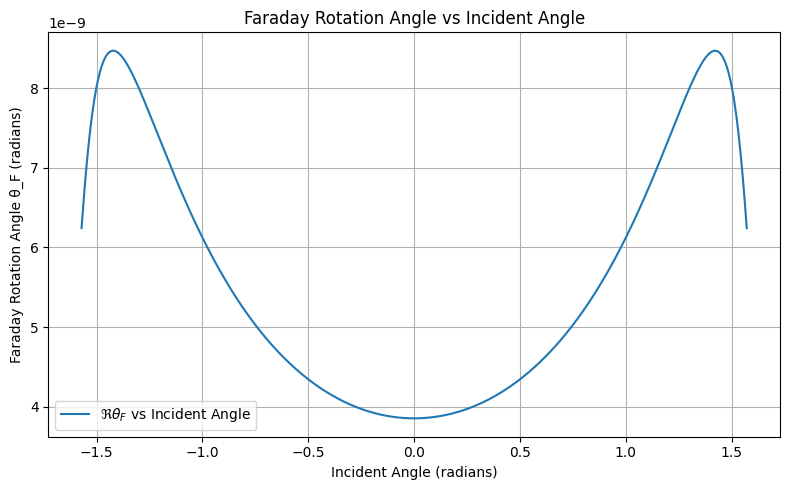

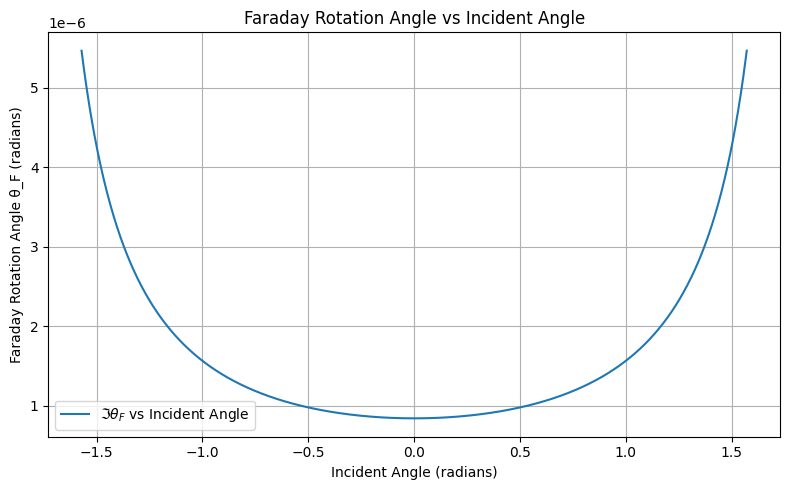

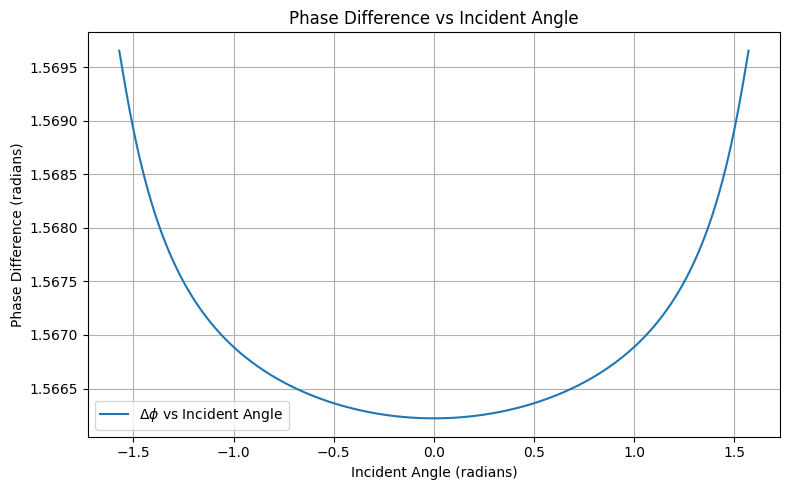

In [2]:
import numpy as np
import matplotlib.pyplot as plt

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n_s = 3.46
n_f = 10.0
n_v = 1.0
d = 1e-8
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5

theta_range = np.linspace(-np.pi / 2, np.pi / 2, 1000)
theta_F_real_list = []
theta_F_imag_list = []
phase_diff_list = []

for theta in theta_range:
    lambda1 = n_v * np.cos(theta)
    lambda2 = n_v * np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2) / n_f
    lambda3 = n_f * np.cos(theta)
    lambda4 = np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2)
    lambda5 = n_f * np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2) / n_s
    lambda6 = n_s * np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2) / n_f
    lambda7 = np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2)

    T12 = np.array([
        [2 * lambda7 / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda6 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
        [4 * a * sigma_xy_b * lambda7**2 * lambda6 / (n_s**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), 2 * lambda6 / (lambda6 + lambda5)]
    ])

    R21 = np.array([
        [(lambda4 - lambda7) / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda5 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
        [4 * a * sigma_xy_b * lambda4**2 * lambda5 / (n_f**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), (lambda5 - lambda6) / (lambda6 + lambda5)]
    ])

    T23 = np.array([
        [2 * lambda4 / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda3 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
        [4 * a * sigma_xy_t * lambda4**2 * lambda3 / (n_f**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), 2 * lambda3 / (lambda3 + lambda2)]
    ])

    R23 = np.array([
        [(lambda4 - lambda1) / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda3 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
        [4 * a * sigma_xy_t * lambda4**2 * lambda3 / (n_f**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), (lambda3 - lambda2) / (lambda3 + lambda2)]
    ])

    delta = k0 * d * lambda4
    exp_idelta = np.exp(-1j * delta)
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, 0.0])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_tilde = exp_idelta * T23 @ inverse_term @ T12 @ E_incident

    theta_F_real = np.arctan(E_tilde[1] / (E_tilde[0] * np.cos(theta))).real
    theta_F_imag = np.arctan(E_tilde[1] / (E_tilde[0] * np.cos(theta))).imag
    phase_diff = np.arctan((E_tilde[1] / (E_tilde[0] * np.cos(theta))).imag / ((E_tilde[1] / (E_tilde[0] * np.cos(theta))).real))
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    phase_diff_list.append(phase_diff)

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_F_real_list, label=r'$\Re\theta_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, phase_diff_list, label=r'$\Delta\phi$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


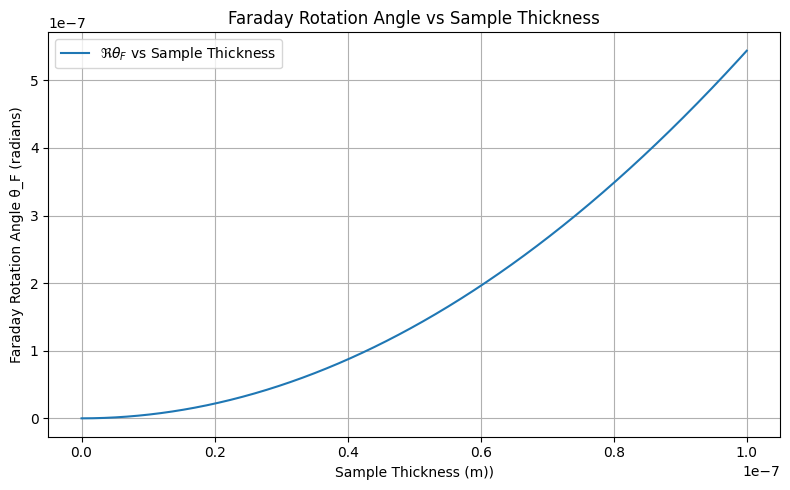

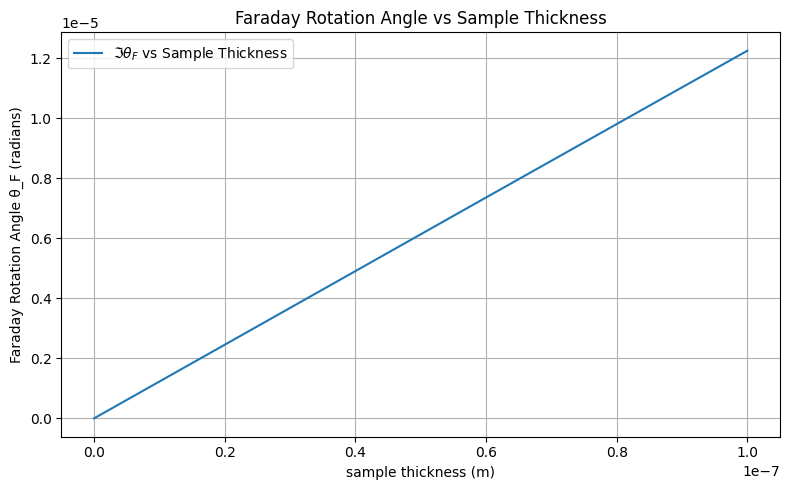

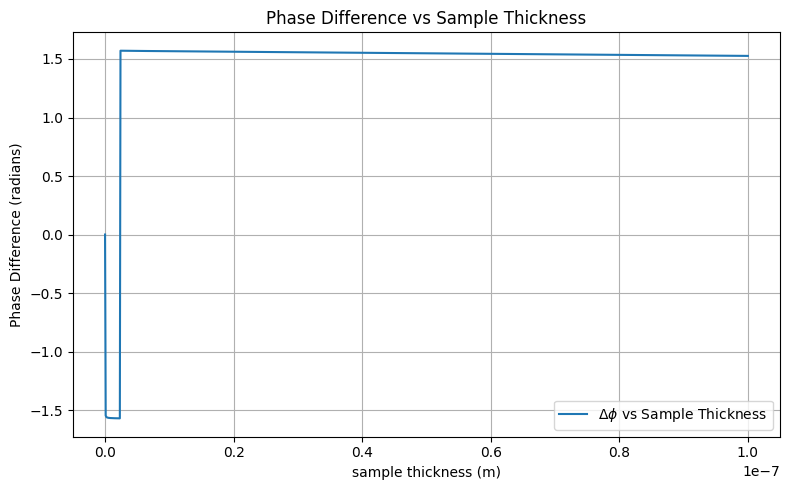

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_s = 3.46
n_f = 10.0
n_v = 1.0
k0 = 2 * np.pi * 1e4 / 3
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5
theta = np.pi / 4

d_range = np.linspace(0, 1e-7, 1000)
theta_F_real_list = []
theta_F_imag_list = []
phase_diff_list = []

for d in d_range:
    lambda1 = n_v * np.cos(theta)
    lambda2 = n_v * np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2) / n_f
    lambda3 = n_f * np.cos(theta)
    lambda4 = np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2)
    lambda5 = n_f * np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2) / n_s
    lambda6 = n_s * np.sqrt(n_f**2 - n_v**2 * np.sin(theta)**2) / n_f
    lambda7 = np.sqrt(n_s**2 - n_v**2 * np.sin(theta)**2)

    T12 = np.array([
        [2 * lambda7 / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda6 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
        [4 * a * sigma_xy_b * lambda7**2 * lambda6 / (n_s**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), 2 * lambda6 / (lambda6 + lambda5)]
    ])

    R21 = np.array([
        [(lambda4 - lambda7) / (lambda7 + lambda4), -4 * a * sigma_xy_b * lambda5 / ((lambda7 + lambda4) * (lambda5 + lambda6))],
        [4 * a * sigma_xy_b * lambda4**2 * lambda5 / (n_f**2 * (lambda7 + lambda4) * (lambda5 + lambda6)), (lambda5 - lambda6) / (lambda6 + lambda5)]
    ])

    T23 = np.array([
        [2 * lambda4 / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda3 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
        [4 * a * sigma_xy_t * lambda4**2 * lambda3 / (n_f**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), 2 * lambda3 / (lambda3 + lambda2)]
    ])

    R23 = np.array([
        [(lambda4 - lambda1) / (lambda4 + lambda1), -4 * a * sigma_xy_t * lambda3 / ((lambda4 + lambda1) * (lambda2 + lambda3))],
        [4 * a * sigma_xy_t * lambda4**2 * lambda3 / (n_f**2 * (lambda4 + lambda1) * (lambda2 + lambda3)), (lambda3 - lambda2) / (lambda3 + lambda2)]
    ])

    delta = k0 * d * lambda4
    exp_idelta = np.exp(-1j * delta)
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, 0.0])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_tilde = exp_idelta * T23 @ inverse_term @ T12 @ E_incident

    theta_F_real = np.arctan(E_tilde[1] / (E_tilde[0] * np.cos(theta))).real
    theta_F_imag = np.arctan(E_tilde[1] / (E_tilde[0] * np.cos(theta))).imag
    phase_diff = np.arctan((E_tilde[1] / (E_tilde[0] * np.cos(theta))).imag / ((E_tilde[1] / (E_tilde[0] * np.cos(theta))).real))
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    phase_diff_list.append(phase_diff)

plt.figure(figsize=(8, 5))
plt.plot(d_range, theta_F_real_list, label=r'$\Re\theta_F$ vs Sample Thickness')
plt.xlabel("Sample Thickness (m))")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs Sample Thickness')
plt.xlabel("sample thickness (m)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, phase_diff_list, label=r'$\Delta\phi$ vs Sample Thickness')
plt.xlabel("sample thickness (m)")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
